In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
sys.path.append('./src/analysis')
sys.path.append('./src/data_handling')
sys.path.append('./src/modeling')
sys.path.append('./src/prediction')
sys.path.append('./src/visualization')
from analyzer import FeatureAnalyzer
from selector import FeatureSelector
from aggregator import DataAggregator
from feature_engineer import BatteryFeatureEngineer
from reader import BatteryDataReader
from cross_validator import CrossValidator
from evaluator import ModelEvaluator
from trainer import ModelTrainer
from predictor import Predictor
from visualizer import ResultVisualizer


# PROCESS DATA B0005

In [3]:
# Read data
dir_data = './dataset'
battery_id_b5 = 'B0005'
battery_id_b7 = 'B0007'
battery_id_b18 = 'B0018'
battery_id_b6 = 'B0006'
def get_data(battery_id):
    df_battery = BatteryDataReader(battery_id, dir_data)
    df_battery.load_data()
    df_capacity, df_charge, df_discharge = df_battery.get_raw_data()
    
    return df_capacity, df_charge, df_discharge

df_capacity_b5, df_charge_b5, df_discharge_b5 = get_data(battery_id_b5)


df_capacity_b6, df_charge_b6, df_discharge_b6 = get_data(battery_id_b6)


df_capacity_b7, df_charge_b7, df_discharge_b7 = get_data(battery_id_b7)


df_capacity_b18, df_charge_b18, df_discharge_b18 = get_data(battery_id_b18)


--- Loading data for battery: B0005 ---
  Successfully loaded: capacity_B0005.csv
  Successfully loaded: charge_B0005.csv
  Successfully loaded: discharge_B0005.csv
--- Data loading process completed for B0005 ---
--- Loading data for battery: B0006 ---
  Successfully loaded: capacity_B0006.csv
  Successfully loaded: charge_B0006.csv
  Successfully loaded: discharge_B0006.csv
--- Data loading process completed for B0006 ---
--- Loading data for battery: B0007 ---
  Successfully loaded: capacity_B0007.csv
  Successfully loaded: charge_B0007.csv
  Successfully loaded: discharge_B0007.csv
--- Data loading process completed for B0007 ---
--- Loading data for battery: B0018 ---
  Successfully loaded: capacity_B0018.csv
  Successfully loaded: charge_B0018.csv
  Successfully loaded: discharge_B0018.csv
--- Data loading process completed for B0018 ---


# NEW FEATURE ENGINEERING
- Temperature mean in discharge/charge (not necesary)
- ICA


In [5]:
# Temperature mean
df_charge_b5.columns

Index(['cycle', 'ambient_temperature', 'data_time', 'voltage_measured',
       'current_measured', 'temperature_measured', 'current_charge',
       'voltage_charge', 'time'],
      dtype='object')

In [19]:
df_capacity_b5.columns

Index(['cycle', 'ambient_temperature', 'datetime', 'capacity'], dtype='object')

In [ ]:
fe_b5 = BatteryFeatureEngineer(
    battery_id=battery_id_b5,
    capacity_df=df_capacity_b5,
    charge_df=df_charge_b5,
    discharge_df=df_discharge_b5
)

# Operata process feature engineering
fe_b5.process()
df_fe_b5 = fe_b5.get_processed_data()

fe_b6 = BatteryFeatureEngineer(
    battery_id=battery_id_b6,
    capacity_df=df_capacity_b6,
    charge_df=df_charge_b6,
    discharge_df=df_discharge_b6
)

# Operata process feature engineering
fe_b6.process()
df_fe_b6 = fe_b6.get_processed_data()

fe_b7 = BatteryFeatureEngineer(
    battery_id=battery_id_b7,
    capacity_df=df_capacity_b7,
    charge_df=df_charge_b7,
    discharge_df=df_discharge_b7
)

# Operata process feature engineering
fe_b7.process()
df_fe_b7 = fe_b7.get_processed_data()

fe_b18 = BatteryFeatureEngineer(
    battery_id=battery_id_b18,
    capacity_df=df_capacity_b18,
    charge_df=df_charge_b18,
    discharge_df=df_discharge_b18
)

# Operata process feature engineering
fe_b18.process()
df_fe_b18 = fe_b18.get_processed_data()
    

In [ ]:
df_fe_b5.info()

In [ ]:
df_fe_b6.info()

In [ ]:
df_fe_b7.info()

In [ ]:
df_fe_b18.info()

In [10]:
fe_b5.get_all_name_feature()

['SOH',
 'RUL',
 'capacity',
 'Discharge_V_median',
 'Discharge_V_skew',
 'Discharge_T_delta',
 'Discharge_T_std',
 'Charge_T_std',
 'Time_CC_phase',
 'Time_CV_phase',
 'CV_I_end']

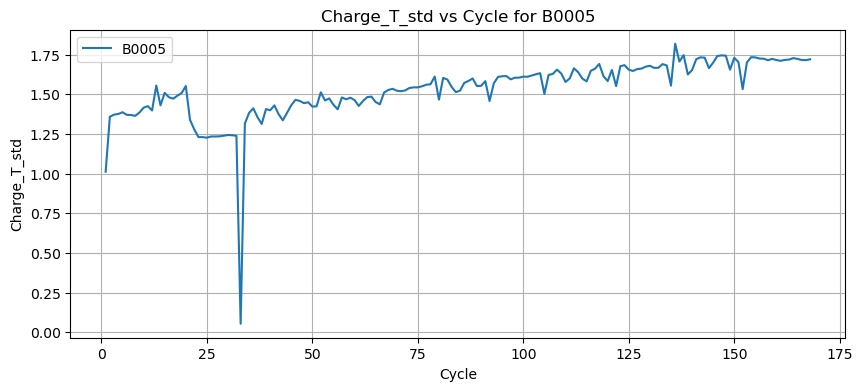

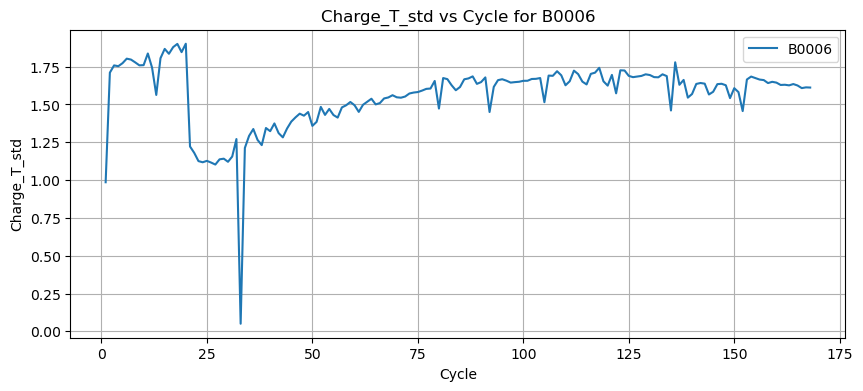

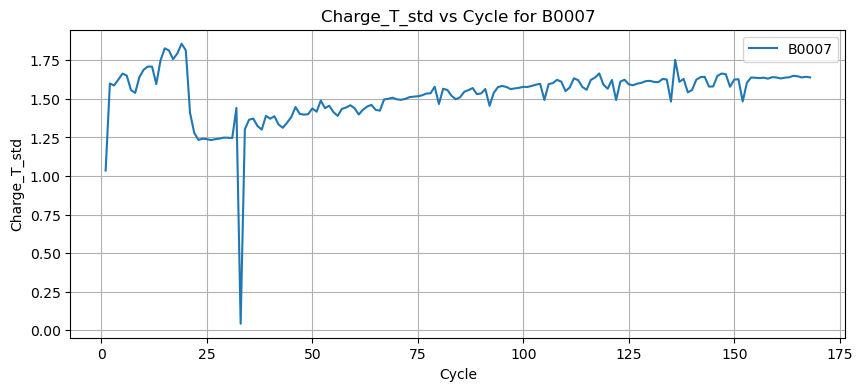

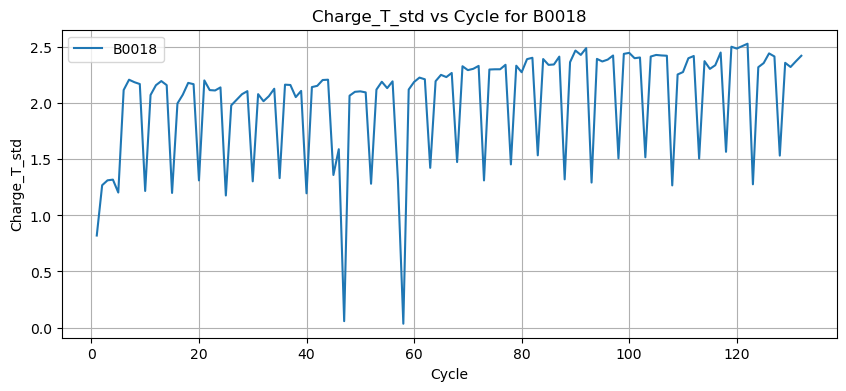

In [21]:
fe_b5.plot_feature_vs_cycle('Charge_T_std')
fe_b6.plot_feature_vs_cycle('Charge_T_std')
fe_b7.plot_feature_vs_cycle('Charge_T_std')
fe_b18.plot_feature_vs_cycle('Charge_T_std')


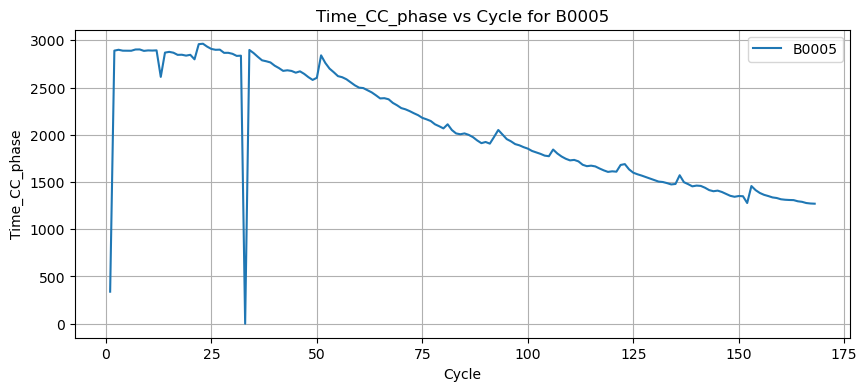

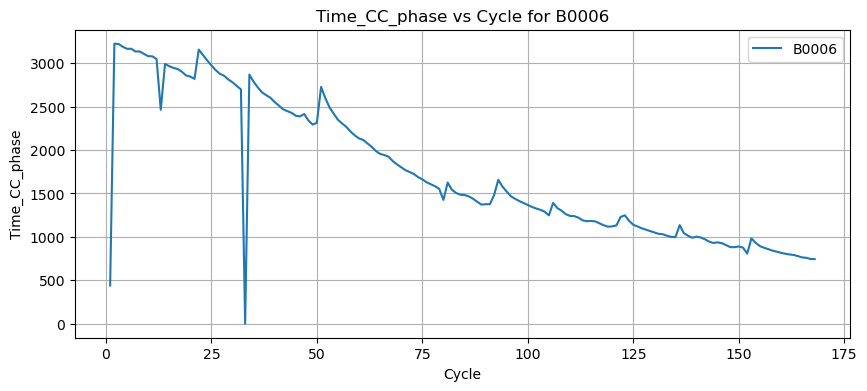

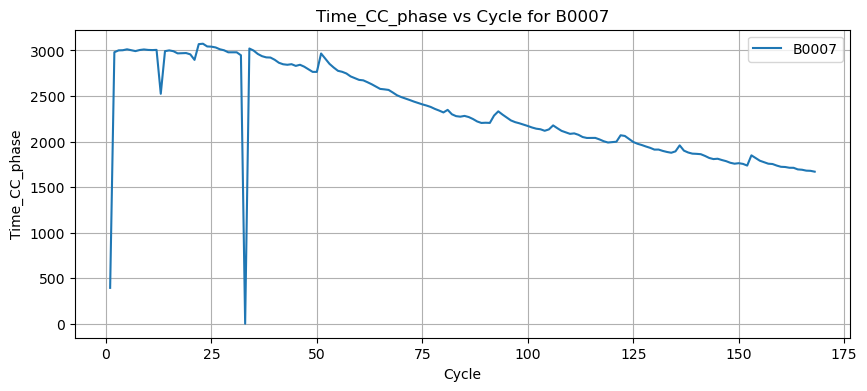

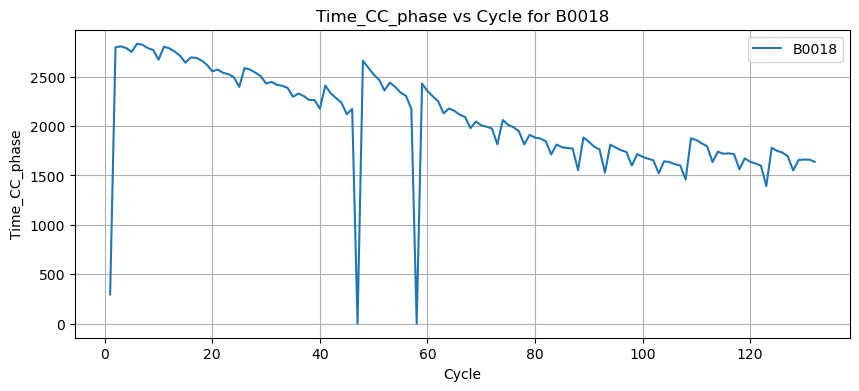

In [25]:
# Visualization feature
fe_b5.plot_feature_vs_cycle('Time_CC_phase')
fe_b6.plot_feature_vs_cycle('Time_CC_phase')
fe_b7.plot_feature_vs_cycle('Time_CC_phase')
fe_b18.plot_feature_vs_cycle('Time_CC_phase')

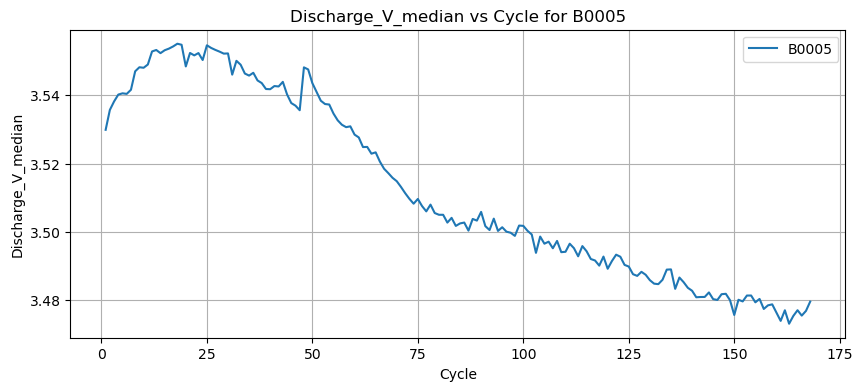

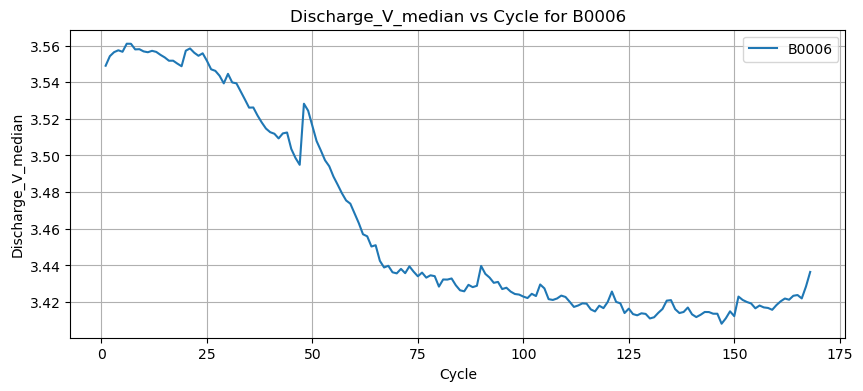

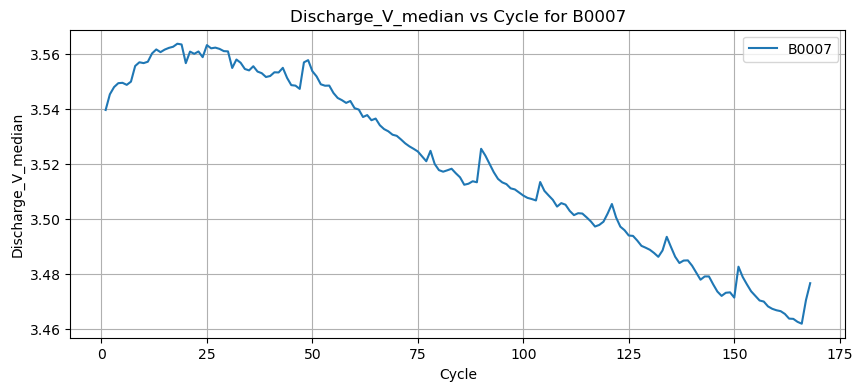

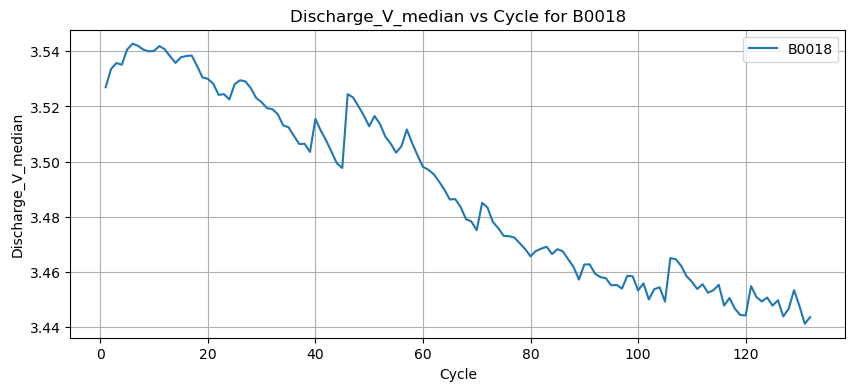

In [27]:
fe_b5.plot_feature_vs_cycle('Discharge_V_median')
fe_b6.plot_feature_vs_cycle('Discharge_V_median')
fe_b7.plot_feature_vs_cycle('Discharge_V_median')
fe_b18.plot_feature_vs_cycle('Discharge_V_median')

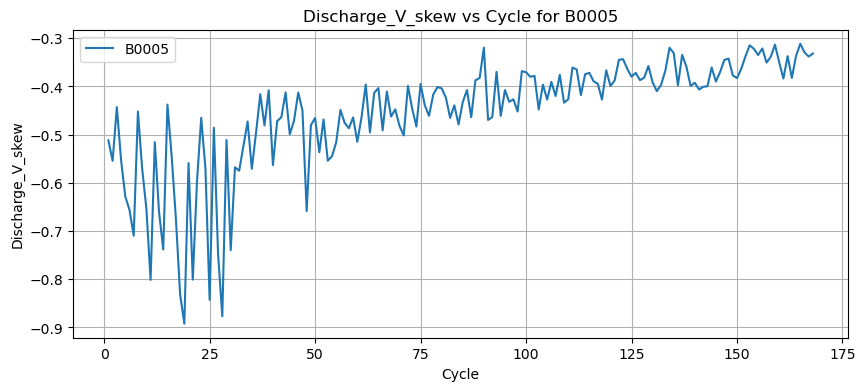

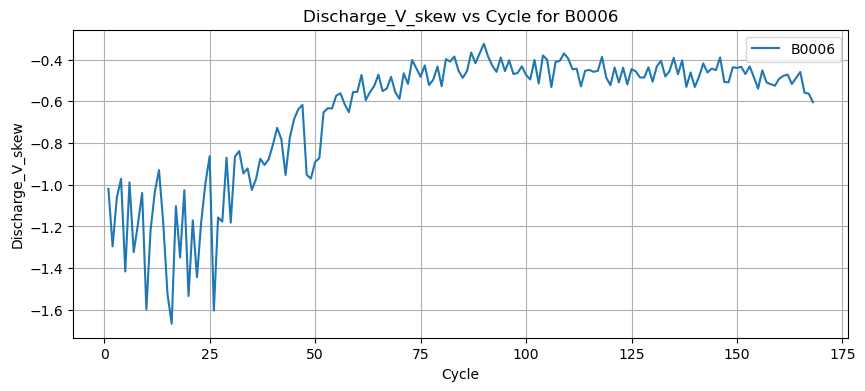

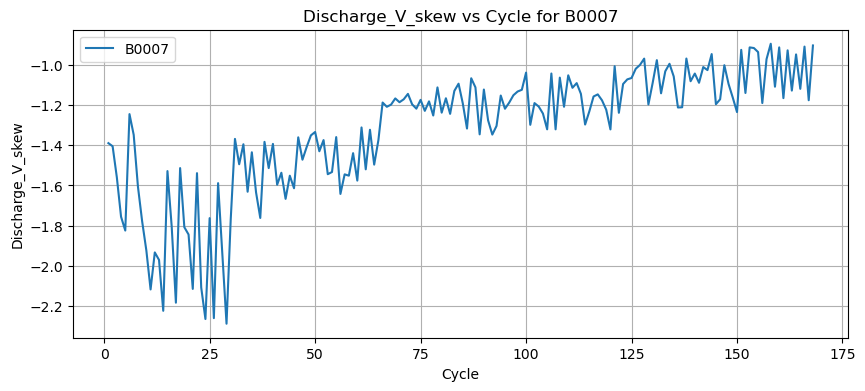

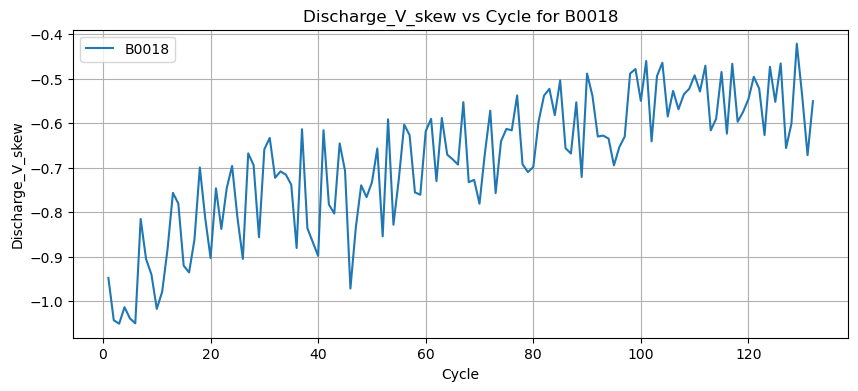

In [29]:
fe_b5.plot_feature_vs_cycle('Discharge_V_skew')
fe_b6.plot_feature_vs_cycle('Discharge_V_skew')
fe_b7.plot_feature_vs_cycle('Discharge_V_skew')
fe_b18.plot_feature_vs_cycle('Discharge_V_skew')

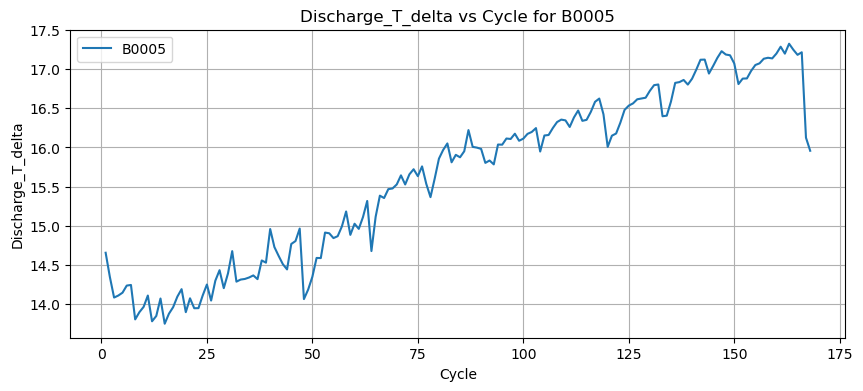

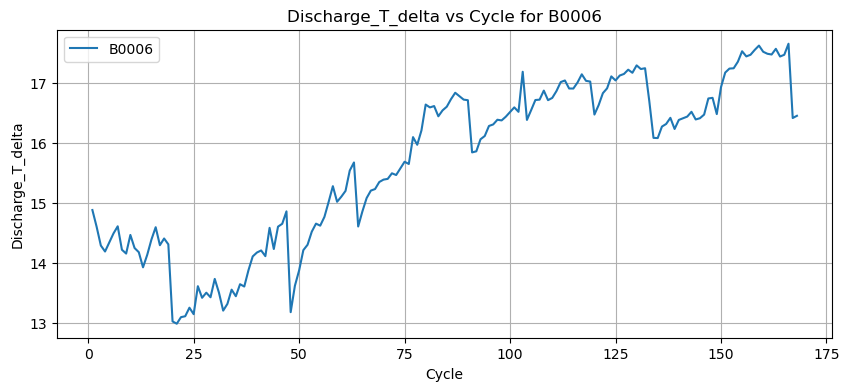

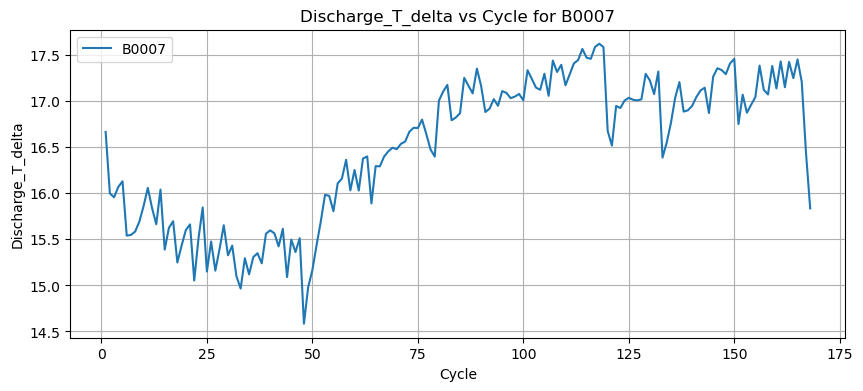

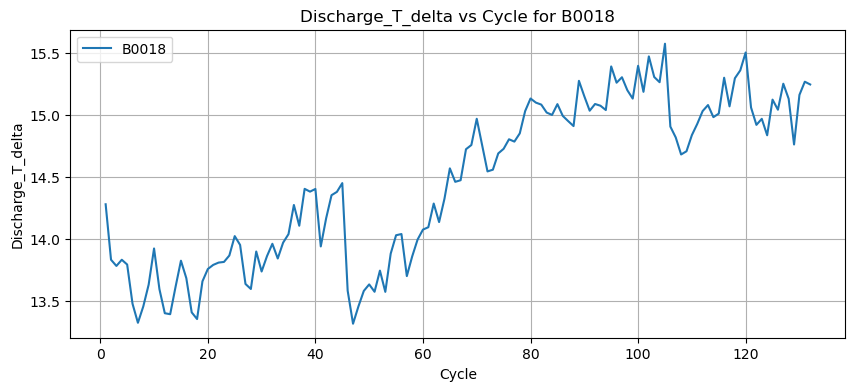

In [30]:
fe_b5.plot_feature_vs_cycle('Discharge_T_delta')
fe_b6.plot_feature_vs_cycle('Discharge_T_delta')
fe_b7.plot_feature_vs_cycle('Discharge_T_delta')
fe_b18.plot_feature_vs_cycle('Discharge_T_delta')

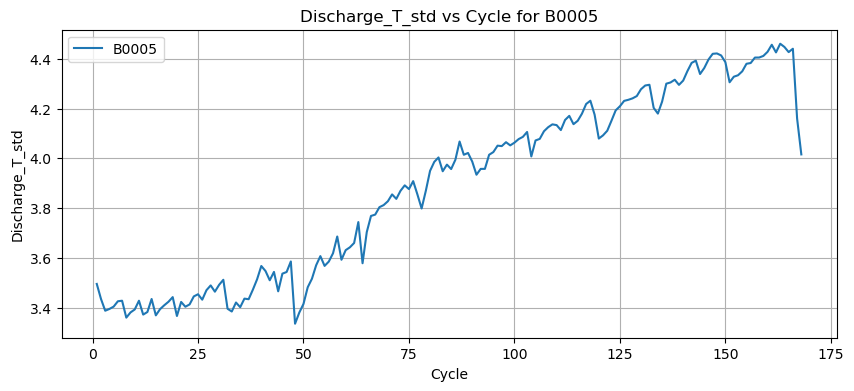

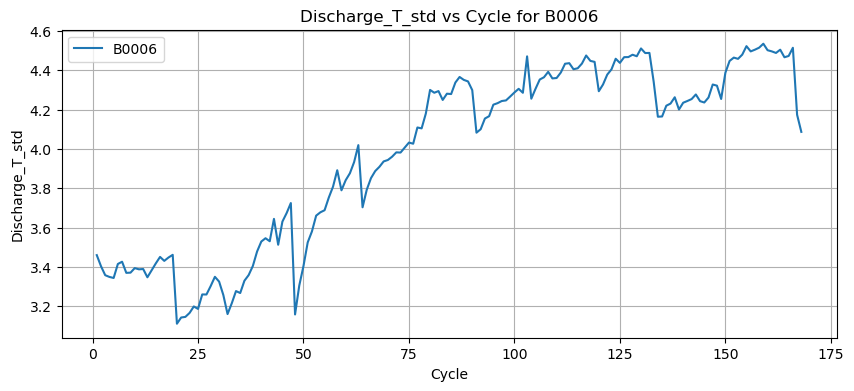

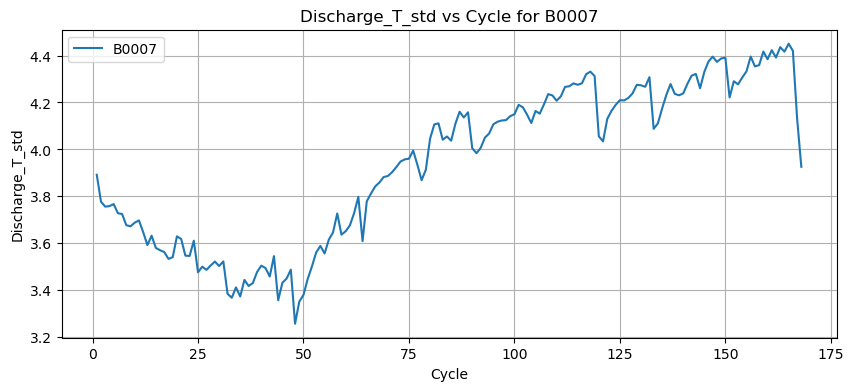

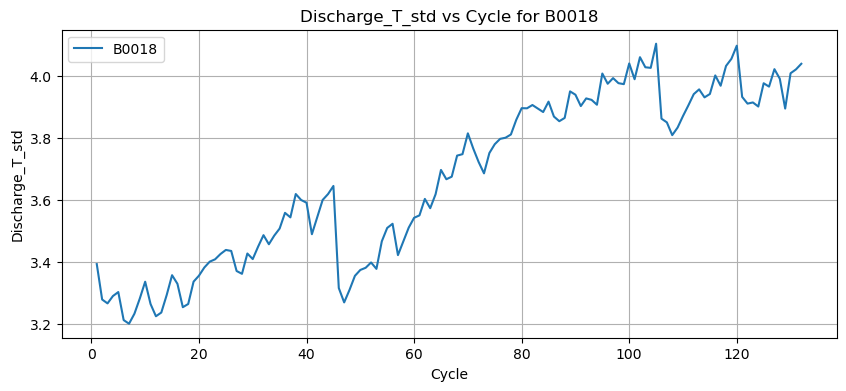

In [31]:
fe_b5.plot_feature_vs_cycle('Discharge_T_std')
fe_b6.plot_feature_vs_cycle('Discharge_T_std')
fe_b7.plot_feature_vs_cycle('Discharge_T_std')
fe_b18.plot_feature_vs_cycle('Discharge_T_std')

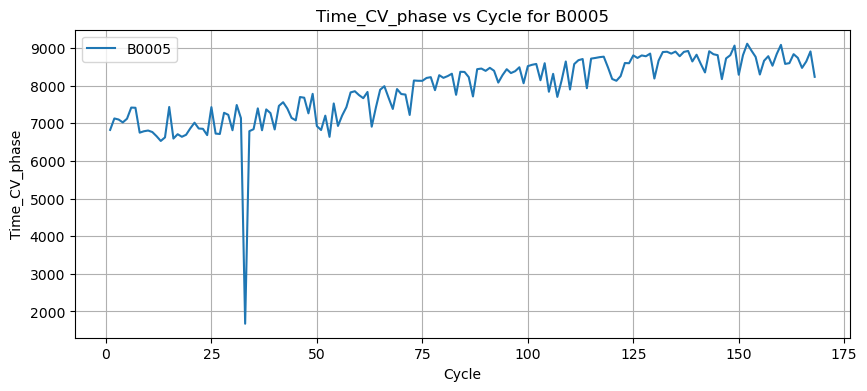

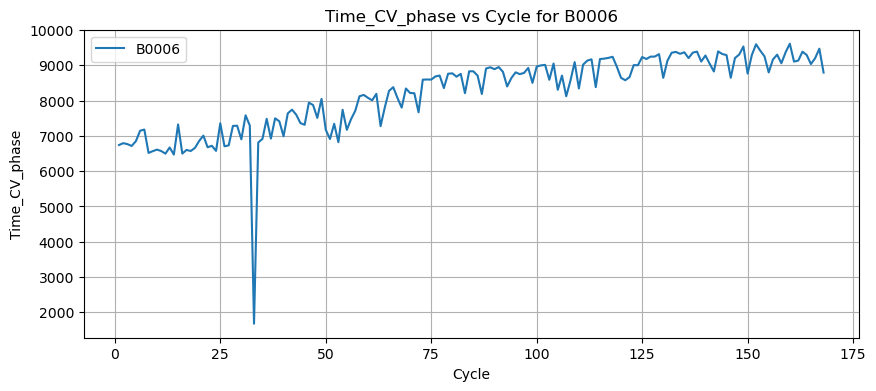

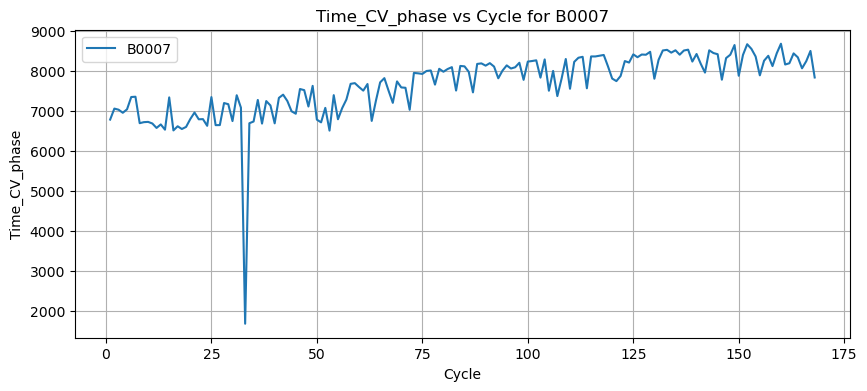

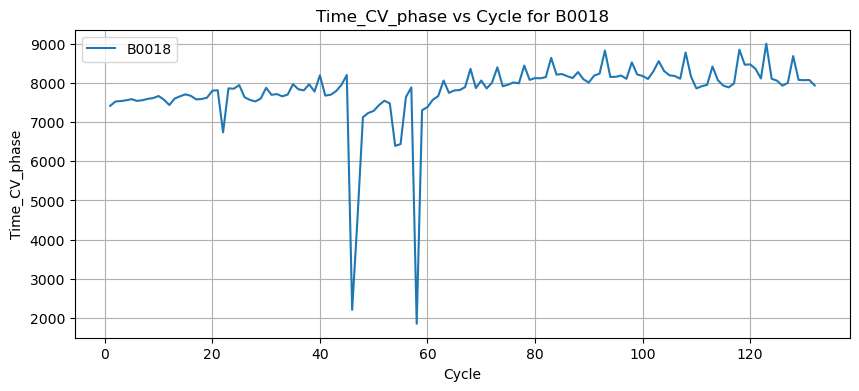

In [33]:
fe_b5.plot_feature_vs_cycle('Time_CV_phase')
fe_b6.plot_feature_vs_cycle('Time_CV_phase')
fe_b7.plot_feature_vs_cycle('Time_CV_phase')
fe_b18.plot_feature_vs_cycle('Time_CV_phase')


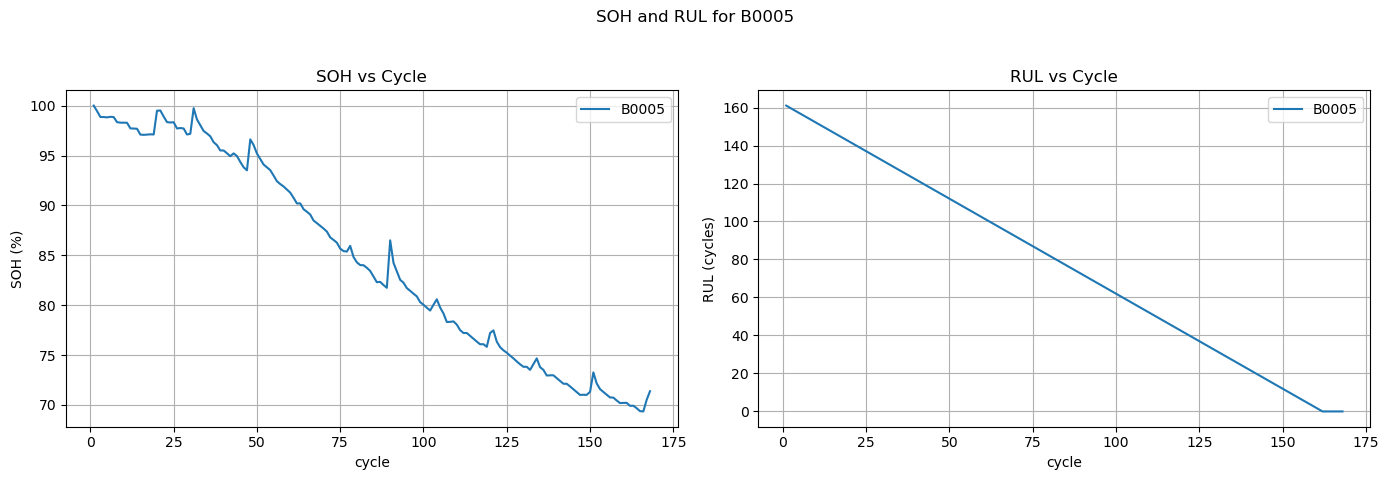

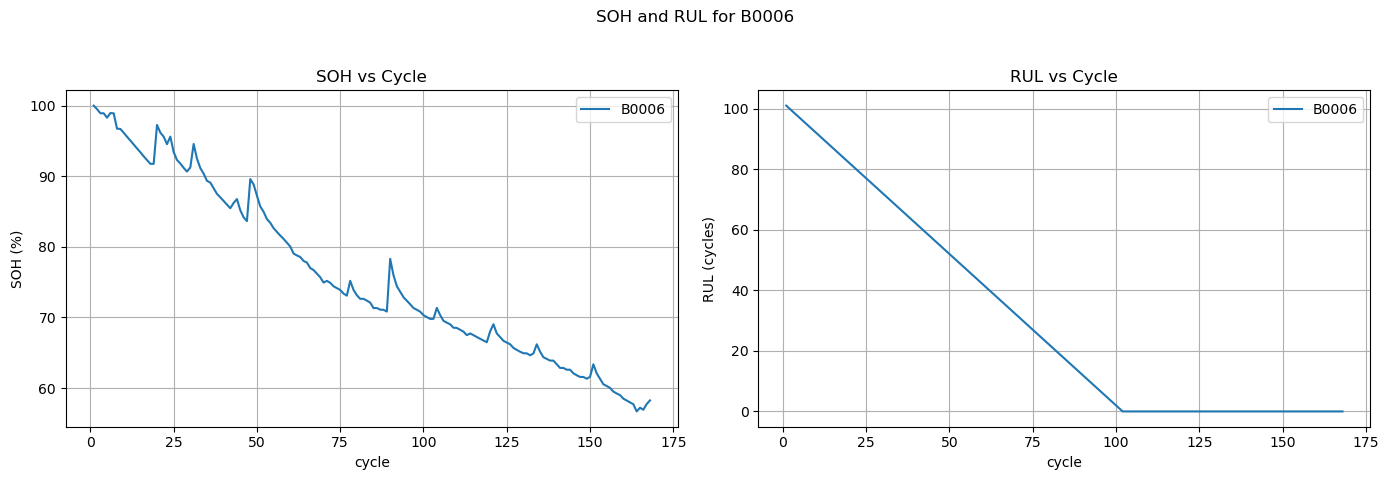

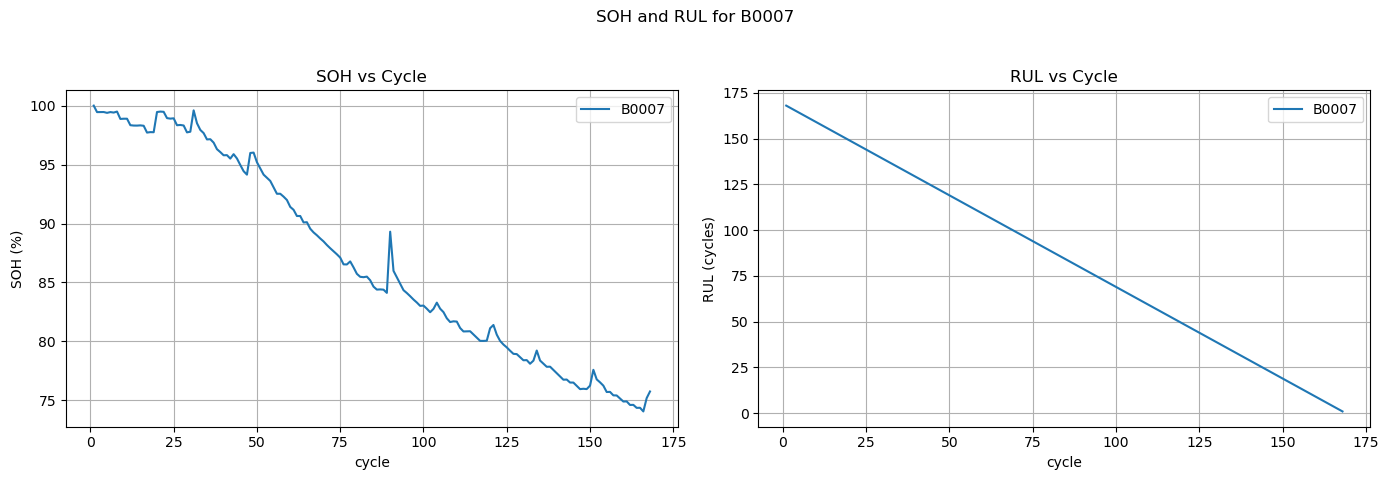

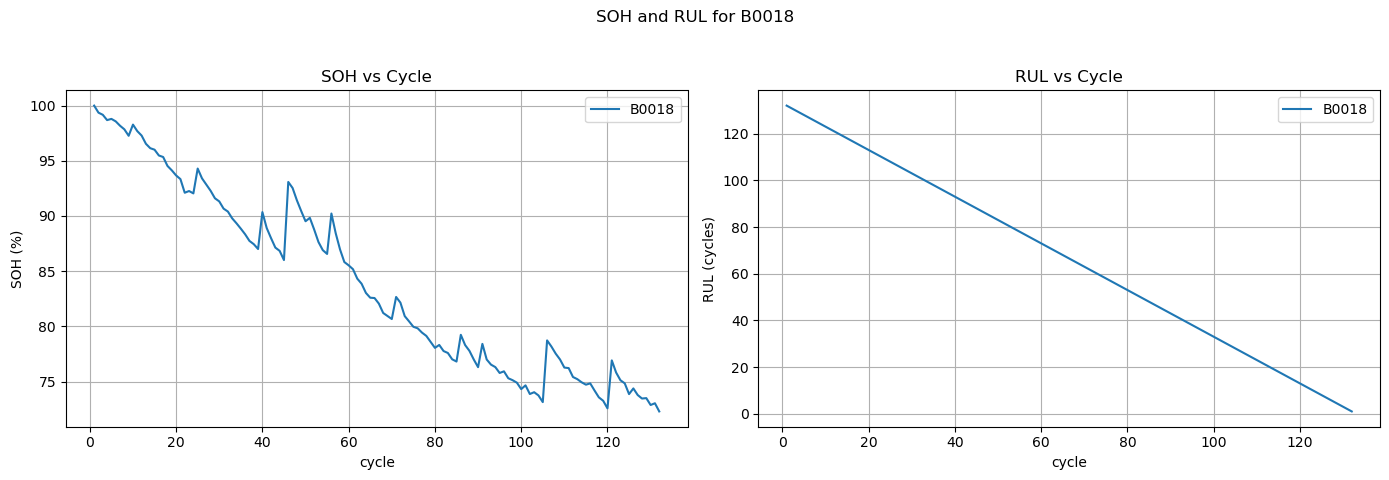

In [28]:
fe_b5.plot_soh_rul()
fe_b6.plot_soh_rul()
fe_b7.plot_soh_rul()
fe_b18.plot_soh_rul()

In [34]:
# Cac feature co cac outlier bat thuong:
# Time_CV_phase
# Time_CC_phase
# Charge_T_std
#

# PROCESS OUTLIER

In [11]:
process_data_b5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cycle               168 non-null    int64  
 1   capacity            168 non-null    float64
 2   SOH                 168 non-null    float64
 3   RUL                 168 non-null    int64  
 4   Discharge_V_median  168 non-null    float64
 5   Discharge_V_skew    168 non-null    float64
 6   Discharge_T_delta   168 non-null    float64
 7   Discharge_T_std     168 non-null    float64
 8   Charge_T_std        168 non-null    float64
 9   Time_CC_phase       168 non-null    float64
 10  Time_CV_phase       168 non-null    float64
 11  CV_I_end            168 non-null    float64
 12  battery_id          168 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 17.2+ KB


In [12]:
process_data_b5.head()

,cycle,capacity,SOH,RUL,Discharge_V_median,Discharge_V_skew,Discharge_T_delta,Discharge_T_std,Charge_T_std,Time_CC_phase,Time_CV_phase,CV_I_end,battery_id
0,1,2.035338,100.000000,101,3.548989,-1.019780,14.885913,3.460482,0.985631,439.438,6739.937,-0.004522,B0006
1,2,2.025140,99.498985,100,3.554208,-1.295688,14.607964,3.404115,1.710039,3224.844,6792.750,-0.001965,B0006
2,3,2.013326,98.918547,99,3.556400,-1.061351,14.295145,3.358434,1.758008,3221.765,6765.344,-0.003012,B0006
3,4,2.013285,98.916498,98,3.557417,-0.971438,14.195243,3.349620,1.752708,3189.625,6713.781,0.001331,B0006
4,5,2.000528,98.289755,97,3.556609,-1.415468,14.343783,3.344364,1.772646,3166.015,6849.922,0.018652,B0006


In [14]:
df_process_outlier = process_data_b5.copy()

In [15]:
df_process_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cycle               168 non-null    int64  
 1   capacity            168 non-null    float64
 2   SOH                 168 non-null    float64
 3   RUL                 168 non-null    int64  
 4   Discharge_V_median  168 non-null    float64
 5   Discharge_V_skew    168 non-null    float64
 6   Discharge_T_delta   168 non-null    float64
 7   Discharge_T_std     168 non-null    float64
 8   Charge_T_std        168 non-null    float64
 9   Time_CC_phase       168 non-null    float64
 10  Time_CV_phase       168 non-null    float64
 11  CV_I_end            168 non-null    float64
 12  battery_id          168 non-null    object 
dtypes: float64(10), int64(2), object(1)
memory usage: 17.2+ KB


In [16]:
df_process_outlier.head()

,cycle,capacity,SOH,RUL,Discharge_V_median,Discharge_V_skew,Discharge_T_delta,Discharge_T_std,Charge_T_std,Time_CC_phase,Time_CV_phase,CV_I_end,battery_id
0,1,2.035338,100.000000,101,3.548989,-1.019780,14.885913,3.460482,0.985631,439.438,6739.937,-0.004522,B0006
1,2,2.025140,99.498985,100,3.554208,-1.295688,14.607964,3.404115,1.710039,3224.844,6792.750,-0.001965,B0006
2,3,2.013326,98.918547,99,3.556400,-1.061351,14.295145,3.358434,1.758008,3221.765,6765.344,-0.003012,B0006
3,4,2.013285,98.916498,98,3.557417,-0.971438,14.195243,3.349620,1.752708,3189.625,6713.781,0.001331,B0006
4,5,2.000528,98.289755,97,3.556609,-1.415468,14.343783,3.344364,1.772646,3166.015,6849.922,0.018652,B0006


In [17]:
df_process_outlier.describe()

,cycle,capacity,SOH,RUL,Discharge_V_median,Discharge_V_skew,Discharge_T_delta,Discharge_T_std,Charge_T_std,Time_CC_phase,Time_CV_phase,CV_I_end
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,84.500000,1.546851,75.999710,30.660714,3.462543,-0.652969,15.679163,3.976899,1.560224,1756.372369,8211.149756,0.018104
std,48.641546,0.252038,12.383105,33.784954,0.054190,0.307838,1.351479,0.451236,0.215857,796.584906,1076.263523,0.010983
min,1.000000,1.153818,56.689285,0.000000,3.408168,-1.666099,12.993038,3.111737,0.050555,0.000000,1674.484000,-0.005652
25%,42.750000,1.347427,66.201653,0.000000,3.420030,-0.863953,14.456435,3.504563,1.482737,1094.742000,7352.413500,0.017313
50%,84.500000,1.485372,72.979131,17.500000,3.432592,-0.512383,16.165235,4.166083,1.626851,1484.297000,8591.859500,0.019464
75%,126.250000,1.767208,86.826264,59.250000,3.513215,-0.450449,16.753081,4.359396,1.679501,2465.469000,9066.437000,0.020499
max,168.000000,2.035338,100.000000,101.000000,3.561003,-0.324143,17.655021,4.535239,1.901252,3224.844000,9612.063000,0.037812
